<a href="https://colab.research.google.com/github/harshitsingh85420/ML/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tensorflow.keras.models import Model


In [4]:
from tensorflow.keras.layers import Input,LSTM, Dense

In [5]:
import numpy as np

In [6]:
batchsize=64

In [7]:
epochs=100

In [8]:
latentdim=256

In [9]:
numsamples=10000

In [ ]:
datapath='/spa.txt'

In [ ]:
inputtexts=[]

In [ ]:
targettexts=[]

In [ ]:
inputcharacters=set()

In [ ]:
targetcharacters=set()

In [ ]:
with open(datapath,'r',encoding='utf-8') as f:
    lines=f.read().split('\n')
    

In [ ]:
for line in lines[:min(numsamples,len(lines)-1)]:
    inputtext,targettext=line.split('\t')
    targettext='\t'+targettext+'\n'
    inputtexts.append(inputtext)
    targettexts.append(targettext)
    for char in inputtext:
        if char not in inputcharacters:
            inputcharacters.add(char)
    for char in targettext:
        if char not in targetcharacters:
            targetcharacters.add(char)        

In [ ]:
len(targetcharacters)

86

In [ ]:
inputcharacters=sorted(list(inputcharacters))

In [ ]:
targetcharacters=sorted(list(targetcharacters))

In [ ]:
len(inputtexts)

10000

In [ ]:
numencodertokens=len(inputcharacters)
numdecodertokens=len(targetcharacters)

In [ ]:
maxencoderseqlength=max([len(txt) for txt in inputtexts])

In [ ]:
maxdecoderseqlength=max([len(txt) for txt in targettexts])

In [ ]:
maxencoderseqlength

17

In [ ]:
maxdecoderseqlength

42

In [ ]:
inputtokenindex=dict([(char,i) for i ,char in enumerate(inputcharacters)])

In [ ]:
targettokenindex=dict([(char,i) for i ,char in enumerate(targetcharacters)])

In [ ]:
inputtexts

['Go.',
 'Go.',
 'Go.',
 'Go.',
 'Hi.',
 'Run!',
 'Run.',
 'Who?',
 'Fire!',
 'Fire!',
 'Fire!',
 'Help!',
 'Help!',
 'Help!',
 'Jump!',
 'Jump.',
 'Stop!',
 'Stop!',
 'Stop!',
 'Wait!',
 'Wait.',
 'Go on.',
 'Go on.',
 'Hello!',
 'I ran.',
 'I ran.',
 'I try.',
 'I won!',
 'Oh no!',
 'Relax.',
 'Smile.',
 'Attack!',
 'Attack!',
 'Get up.',
 'Go now.',
 'Got it!',
 'Got it?',
 'Got it?',
 'He ran.',
 'Hop in.',
 'Hug me.',
 'I fell.',
 'I know.',
 'I left.',
 'I lied.',
 'I lost.',
 'I quit.',
 'I quit.',
 'I work.',
 "I'm 19.",
 "I'm up.",
 'Listen.',
 'Listen.',
 'Listen.',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'No way!',
 'Really?',
 'Really?',
 'Thanks.',
 'Thanks.',
 'Try it.',
 'We try.',
 'We won.',
 'Why me?',
 'Ask Tom.',
 'Awesome!',
 'Be calm.',
 'Be cool.',
 'Be fair.',
 'Be kind.',
 'Be nice.',
 'Beat it.',
 'Call me.',
 'Call me.',
 'Call me.',
 'Call us.',
 'Come in.',
 'Come in.',
 'Come in.',
 'Come

In [ ]:
encoderinputdata=np.zeros((len(inputtexts),maxencoderseqlength,len(inputcharacters)),dtype='float32')

In [ ]:
decoderinputdata=np.zeros((len(inputtexts),maxdecoderseqlength,len(targetcharacters)),dtype='float32')

In [ ]:
decodertargetdata=np.zeros((len(inputtexts),maxdecoderseqlength,len(targetcharacters)),dtype='float32')

In [ ]:
for i ,(inputtext,targettext) in enumerate(zip(inputtexts,targettexts)):
    for t,char in enumerate(inputtext):
        encoderinputdata[i,t,inputtokenindex[char]]=1.
    encoderinputdata[i,t+1:,inputtokenindex[' ']]=1.
    for t,char in enumerate(targettext):
        decoderinputdata[i,t,targettokenindex[char]]=1.
        if t>0:
            decodertargetdata[i,t-1,targettokenindex[char]]=1.
    decoderinputdata[i,t+1:,targettokenindex[' ']]=1.
    decodertargetdata[i,t:,targettokenindex[' ']]=1.

In [ ]:
encoderinputdata.shape

(10000, 17, 71)

In [ ]:
decoderinputdata.shape

(10000, 42, 86)

In [ ]:
decodertargetdata.shape

(10000, 42, 86)

In [ ]:
encoderinputs=Input(shape=(None,numencodertokens))

In [ ]:
encoder=LSTM(latentdim,return_state=True)

In [ ]:
encoderoutputs,stateh,statec=encoder(encoderinputs)

In [ ]:
encoderstates=[stateh,statec]

In [ ]:
decoderinputs=Input(shape=(None,numdecodertokens))

In [ ]:
decoderlstm=LSTM(latentdim,return_sequences=True,return_state=True)

In [ ]:
decoderoutputs,_,_=decoderlstm(decoderinputs,initial_state=encoderstates)

In [ ]:
decoderdense=Dense(numdecodertokens,activation='softmax')

In [ ]:
decoderoutputs=decoderdense(decoderoutputs)

In [ ]:
m=Model([encoderinputs,decoderinputs],decoderoutputs)

In [ ]:
m.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
m.fit([encoderinputdata,decoderinputdata],decodertargetdata,batch_size=batchsize,epochs=epochs,validation_split=0.2)

Epoch 1/100
125/125 [==============================] - 38s 275ms/step - loss: 1.4139 - accuracy: 0.6573 - val_loss: 1.3500 - val_accuracy: 0.6432
Epoch 2/100
125/125 [==============================] - 34s 274ms/step - loss: 1.0466 - accuracy: 0.7134 - val_loss: 1.1021 - val_accuracy: 0.6855
Epoch 3/100
125/125 [==============================] - 34s 269ms/step - loss: 0.8664 - accuracy: 0.7476 - val_loss: 0.9557 - val_accuracy: 0.7143
Epoch 4/100
125/125 [==============================] - 34s 269ms/step - loss: 0.7926 - accuracy: 0.7639 - val_loss: 0.9025 - val_accuracy: 0.7274
Epoch 5/100
125/125 [==============================] - 34s 274ms/step - loss: 0.7367 - accuracy: 0.7784 - val_loss: 0.8546 - val_accuracy: 0.7404
Epoch 6/100
125/125 [==============================] - 34s 269ms/step - loss: 0.6951 - accuracy: 0.7904 - val_loss: 0.8173 - val_accuracy: 0.7527
Epoch 7/100
125/125 [==============================] - 34s 276ms/step - loss: 0.6595 - accuracy: 0.8009 - val_loss: 0.7887 -

In [ ]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, 71)]   0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, None, 86)]   0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 256),        335872      ['input_1[0][0]']                
                                 (None, 256),                                                     
                                 (None, 256)]                                                     
                                                                                              

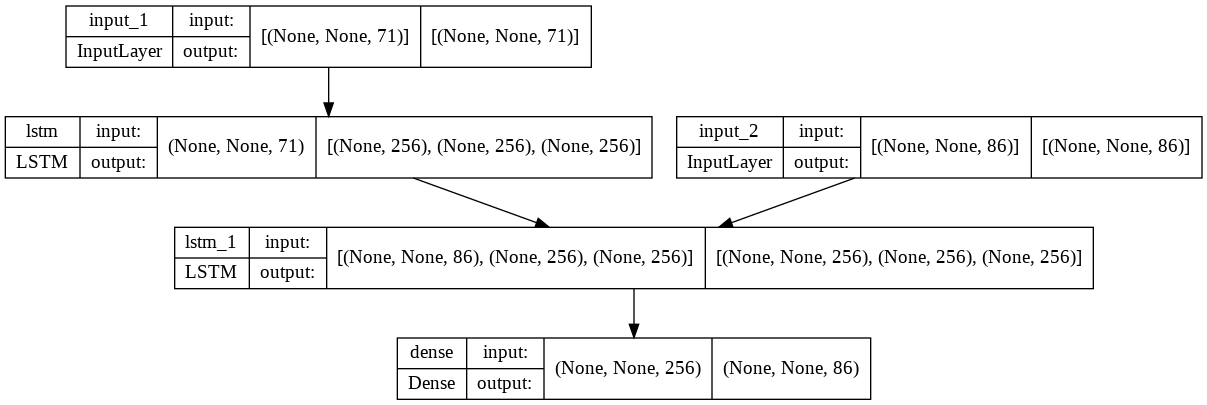

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(m, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
m.save('traslationmodel')

INFO:tensorflow:Assets written to: traslationmodel/assets


INFO:tensorflow:Assets written to: traslationmodel/assets


In [ ]:
encodemodel=Model(encoderinputs,encoderstates)

In [ ]:
decoderstateinputh=Input(shape=(latentdim,))

In [ ]:
decoderstateinputc=Input(shape=(latentdim,))

In [ ]:
decoderstateinputs=[decoderstateinputc,decoderstateinputh]

In [ ]:
decoderoutputs,stateh,statec=decoderlstm(decoderinputs,initial_state=decoderstateinputs)

In [ ]:
decoderstates=[stateh,statec]

In [ ]:
decoderoutputs=decoderdense(decoderoutputs)

In [ ]:
decodermodel=Model(
    [decoderinputs]+decoderstateinputs,
    [decoderoutputs]+decoderstates)

In [ ]:
reverseinputcharindex=dict((i,char) for char,i in inputtokenindex.items())

In [1]:
reversetargetcharindex=dict((i,char) for char,i in targettokenindex.items())

NameError: ignored

In [ ]:
def decode_sequence(inputseq):
    statesvalue=encodemodel.predict(inputseq)
    targetseq=np.zeros((1,1,numdecodertokens))
    targetseq[0,0,targettokenindex['\t']]=1
    stopcondition=False
    decodedsentence=''
    while not stopcondition:
        outputtokens,h,c=decodermodel.predict([targetseq]+statesvalue)
        sampledtokenindex=np.argmax(outputtokens[0,-1,:])
        sampleschar=reversetargetcharindex[sampledtokenindex]
        decodedsentence+=sampleschar
        if(sampleschar=='\n'or len(decodedsentence)>maxdecoderseqlength):
            stopcondition=True
        targetseq=np.zeros((1,1,numdecodertokens))
        targetseq[0,0,sampledtokenindex]=1
        statesvalue=[h,c]
    return decodedsentence

In [ ]:
for seqindex in range(100,200):
    inputseq=encoderinputdata[seqindex:seqindex+1]
    decodedsentence=decode_sequence(inputseq)
    print('-')
    print('INPUT:',inputtexts[seqindex])
    print('DECODED:',decodedsentence)